# Homework 1

# Part 1: Python Intro

For this part, you will have more exercises to get more familar with Python. Just go along with this notebook and try to complete the instructions or answer the questions using your Python skills!

In [1]:
x=[1,2,3,4]

**Generate the following list from the above list 'x' by using 'list comprehension'. (Refer to the following link for more detail: https://www.pythonforbeginners.com/basics/list-comprehensions-in-python)**

In [2]:
[item**2 for item in x]

[1, 4, 9, 16]

In [3]:
li = [3, 6, 2, 7, 1, 9]

**Generate the following list from the above list 'li'**

In [4]:
[item*2 for item in li if item>5 ]

[12, 14, 18]

**Create a function that grabs the email website domain from a string in the form:**

    user@domain.com
    
**So for example, passing "user@domain.com" would return: domain.com**

In [5]:
import re
str1='user@domain.com'
def extract(str1):
    return re.match(r'.*@(.*)',str1).groups()[0]
extract(str1)

'domain.com'

In [6]:
u='user@domain.com'
def my_func(u):
    print (u.split('r',1)[1])
my_func(u)  

@domain.com


# Part 2: More about Numpy and Pandas

**For this part you will use Numpy and Pandas to answer each question.**

**Import numpy and pandas**

In [7]:
import numpy as np
import pandas as pd

## DataFrame basics

**Consider the following Python dictionary data and Python list labels:**

In [8]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'], 'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3], 'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1], 'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

**Create a DataFrame df from this dictionary data which has the index labels.**

In [9]:
df=pd.DataFrame.from_dict(data)
df

,animal,age,visits,priority
0,cat,2.5,1,yes
1,cat,3.0,3,yes
2,snake,0.5,2,no
3,dog,NaN,3,yes
4,dog,5.0,2,no
5,cat,2.0,3,no
6,snake,4.5,1,no
7,cat,NaN,1,yes
8,dog,7.0,2,no
9,dog,3.0,1,no


**Display a summary of the basic information about this DataFrame and its data.**

In [10]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 448.0+ bytes


**Return the first 3 rows of the DataFrame df.**

In [11]:
df.iloc[['0','1','2']]

,animal,age,visits,priority
0,cat,2.5,1,yes
1,cat,3.0,3,yes
2,snake,0.5,2,no


**Select only the rows where the number of visits is greater than 3.**

In [12]:
df[df['visits']>3]

,animal,age,visits,priority


**Select the rows where the age is between 2 and 4 (inclusive).**

In [13]:
df[(df['age']>1) & (df['age'] < 4.1)]

,animal,age,visits,priority
0,cat,2.5,1,yes
1,cat,3.0,3,yes
5,cat,2.0,3,no
9,dog,3.0,1,no


**Calculate the sum of all visits (the total number of visits).**

In [14]:
df['visits'].sum()

19

**Calculate the mean age for each different animal in df.**

In [15]:
df.groupby('animal')['age'].mean()

animal
cat      2.5
dog      5.0
snake    2.5
Name: age, dtype: float64

**Sort df first by the values in the 'age' in decending order, then by the value in the 'visit' column in ascending order.**

In [16]:
df.sort_values(by=['age'],ascending=False)

,animal,age,visits,priority
8,dog,7.0,2,no
4,dog,5.0,2,no
6,snake,4.5,1,no
1,cat,3.0,3,yes
9,dog,3.0,1,no
0,cat,2.5,1,yes
5,cat,2.0,3,no
2,snake,0.5,2,no
3,dog,NaN,3,yes
7,cat,NaN,1,yes


In [17]:
df.sort_values(by='visits')

,animal,age,visits,priority
0,cat,2.5,1,yes
6,snake,4.5,1,no
7,cat,NaN,1,yes
9,dog,3.0,1,no
2,snake,0.5,2,no
4,dog,5.0,2,no
8,dog,7.0,2,no
1,cat,3.0,3,yes
3,dog,NaN,3,yes
5,cat,2.0,3,no


## Cleaning Data

### Making a DataFrame easier to work with

**It happens all the time: someone gives you data containing malformed strings and missing data. How do you tidy it up so you can get on with the analysis?**
<br><br>
**Consider the DataFrame to use in the following puzzles:**

In [18]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


**Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column).**

In [19]:
df['FlightNumber']=((df['FlightNumber'].fillna(method='ffill')+df['FlightNumber'].fillna(method='bfill'))/2).astype('int')
df['FlightNumber']

0    10045
1    10055
2    10065
3    10075
4    10085
Name: FlightNumber, dtype: int32

**The From\_To column would be better as two separate columns! Split each string on the underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame.**

In [20]:
df[['From','To']] = df['From_To'].str.split("_",expand=True,)
df

,From_To,FlightNumber,RecentDelays,Airline,From,To
0,LoNDon_paris,10045,"[23, 47]",KLM(!),LoNDon,paris
1,MAdrid_miLAN,10055,[],<Air France> (12),MAdrid,miLAN
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
3,Budapest_PaRis,10075,[13],12. Air France,Budapest,PaRis
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air""",Brussels,londOn


**Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)**

In [21]:
df['From']=df['From'].str.capitalize()
df['To']=df['To'].str.capitalize()

**Delete the From_To column from df and attach the temporary DataFrame from the previous questions.**

In [22]:
df.drop(columns=["From_To"], inplace= True)

In [23]:
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


**In the Airline column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. '(British Airways. )' should become 'British Airways'.**

In [24]:
df['Airline'] = df['Airline'].str.extract('([a-zA-Z\s]+)', expand = False).str.strip()
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM,London,Paris
1,10055,[],Air France,Madrid,Milan
2,10065,"[24, 43, 87]",British Airways,London,Stockholm
3,10075,[13],Air France,Budapest,Paris
4,10085,"[67, 32]",Swiss Air,Brussels,London


**In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.**

**Expand the Series of lists into a DataFrame named delays, rename the columns delay_1, delay_2, etc. and replace the unwanted RecentDelays column in df with delays.**

In [25]:
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM,London,Paris
1,10055,[],Air France,Madrid,Milan
2,10065,"[24, 43, 87]",British Airways,London,Stockholm
3,10075,[13],Air France,Budapest,Paris
4,10085,"[67, 32]",Swiss Air,Brussels,London


The DataFrame should look much better now.

# Part 3: Data Visualization

For this part, you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). To learn about the definition of variables, go to the 'Data' page: https://www.kaggle.com/c/titanic/data. This is a very famous data set in machine learning! 

Download the titanic.csv file and save it to the same location as your Jupyter Notebooks.
Just go along with this notebook and try to complete the instructions or answer the questions using your Python and Data Science skills!

**Import Pandas and Numpy.**

In [26]:
import numpy as np
import pandas as pd

**Import visualization libraries and set %matplotlib inline.**

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Let's start by reading in the titanic_train.csv file into a pandas dataframe.**

In [28]:
titanic = sns.load_dataset('titanic')

**Check the info() of the df.**

In [34]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


**Check the head of df.**

In [30]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Let's answer some questions. The first question is Who were on the Titanic in terms of Age, Gender, Passenger class, etc.

**Were there more male passengers? Draw a countplot.**

<AxesSubplot:xlabel='sex', ylabel='count'>

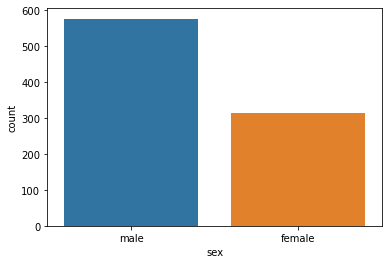

In [32]:
sns.countplot(x='sex',data=titanic)

**Let's then seperate the genders by passenger classes. Anything to note?**

<AxesSubplot:xlabel='sex', ylabel='count'>

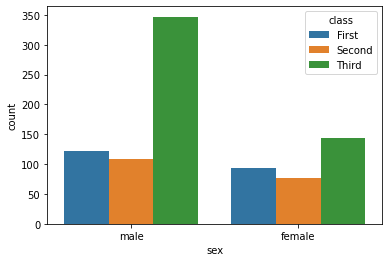

In [33]:
sns.countplot(x='sex',data=titanic, hue='class')

However, it may be useful to know the split between males, females and children. 
Let's treat everyone under 16 as a child and then use the apply technique with a function to create a new column. You can use the following function. You just need to use the apply technique. 

In [31]:
# Funtion to sort through sex
def male_female_child(passenger):
    # get the age and sex
    age, sex = passenger
    if age < 16:
        return "child"
    else:
        return sex

**Now, let's use the new column to further separate the genders. Namely, draw a countplot by passenger class and males/females/children. Anything to note?**

**Let's look at the distribution of ages to get a more precise picture of who the passengers were. You can draw a histogram or a kde plot, for example.** 

**Can you draw a distribution plot of ages by passenger class or sex? Anything to note?**

The second question is What deck were the passengers on and how it does relate to their class?

**We can see that the cabin column has information on the deck but it has several NaN values, so we'll have to drop them. After dropping them, how many uniques value are there in the cabin column?** 

**Notice we only need the first letter of the deck to classify the level (e.g. A, B, C, D, E, F). With a plot, show the number of passengers for each deck. Which deck has most passengers?**

**Who was alone and who was with the family? Lets start by adding a column to define alone. You can add the parent child column with the siblings spouse column.** 

**Now we know that if the Alone column is anything but 0, then the passenger had family aboard and wasn't alone. So let's change the column now so that if the value is greater than 0, we know the passenger was with his/her family, otherwise they were alone. In other words, you can assign 'With Family' when the value is greater than 0 and assign 'Alone' when the value is 0.** 

**What percentage of passengers are alone?** 

**The last question is what factors helped someone survive the sinking. Let's make a count plot of survivorship.** 

**Let's see if the class of passengers had an effect on their survival rate, since the movie Titanic popularized the notion that the 3rd class passengers did not do as well as their 1st and 2nd class counterparts. Anything to note?** 

**Can you further see whether the relationship between passenger class and survivor rate differs by gender (i.e., child, male, and female)? Anything to note?**

**And what about age? Did being younger or older have an effect on survival?**

**Does the relationship differ by gender (i.e., male and female)?**

**Did having a family member increase the odds of surviving the crash? Does it have any interactions with other variables to affect the survival? It's more of an open-ended question.** 

### Great Job!